#### Name: Tan Leong Jun Joseph (U2321339H), Tan Zhe Kai (U2322419A)

# 2.0 Exploratory Data Analysis

Dataset from Kaggle: **"2019 Airline Delays w/ Weather and Airport Detail"** by *Jen Wadkins*

Source: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations

- In this section, we will explore the cleaned dataset by creating visualizations to understand the data better. 
- We look into the individual columns and see what meaning we can generate from the visualizations generated.
- From the visualizations, we gained insights on the most popular airlines, peak periods of travel and information about flight delays.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
# load cleaned data
data = pd.read_csv('cleaned_data.csv')
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,McCarran International,36.08,-115.152,NONE,2.91,0.0,0.0,0.0,65.0,45.0


Documentation of cleaned dataset:
> **MONTH**:				Month  
> **DAY_OF_WEEK**:			Day of Week  
> **DEP_DEL15**: 			TARGET Binary of a departure delay over 15 minutes (1 is yes)  
> **DEP_TIME_BLOCK**:			Departure block  
> **DISTANCE_GROUP**:			Distance group to be flown by departing aircraft  
> **SEGMENT_NUMBER**:			The segment that this tail number is on for the day  
> **CONCURRENT_FLIGHTS**:		Concurrent flights leaving from the airport in the same departure block  
> **NUMBER_OF_SEATS**:		Number of seats on the aircraft  
> **CARRIER_NAME**:			Carrier  
> **AIRPORT_FLIGHTS_MONTH**:		Avg Airport Flights per Month  
> **AIRLINE_FLIGHTS_MONTH**:		Avg Airline Flights per Month  
> **AIRLINE_AIRPORT_FLIGHTS_MONTH**:	Avg Flights per month for Airline AND Airport  
> **AVG_MONTHLY_PASS_AIRPORT**:	Avg Passengers for the departing airport for the month  
> **AVG_MONTHLY_PASS_AIRLINE**:	Avg Passengers for airline for month  
> **FLT_ATTENDANTS_PER_PASS**:	Flight attendants per passenger for airline  
> **GROUND_SERV_PER_PASS**:		Ground service employees (service desk) per passenger for airline  
> **PLANE_AGE**:			Age of departing aircraft  
> **DEPARTING_AIRPORT**:		Departing Airport  
> **LATITUDE**:			Latitude of departing airport  
> **LONGITUDE**:			Longitude of departing airport  
> **PREVIOUS_AIRPORT**:		Previous airport that aircraft departed from  
> **AWND**:				Max wind speed for day  
> **PRCP**:				Inches of precipitation for day  
> **SNOW**:				Inches of snowfall for day  
> **SNWD**:				Inches of snow on ground for day  
> **TMAX**:				Max temperature for day  
> **TMIN**:             Min temperature for day

In [6]:
# check data type and shape
print("Data type: ", type(data))
print("Data shape ", data.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data shape  (5625398, 27)


In [7]:
# print individual variable data types
data.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
AWND                             float64
PRCP                             float64
SNOW                             float64
SNWD            

# Explore Target Variable: Delay - `DEP_DEL15`

- This is the variable that will be used for prediction when building the classification models.

## How many delayed flights were there in 2019?

In [27]:
data['DEP_DEL15'].value_counts()

DEP_DEL15
0    4572558
1    1052840
Name: count, dtype: int64

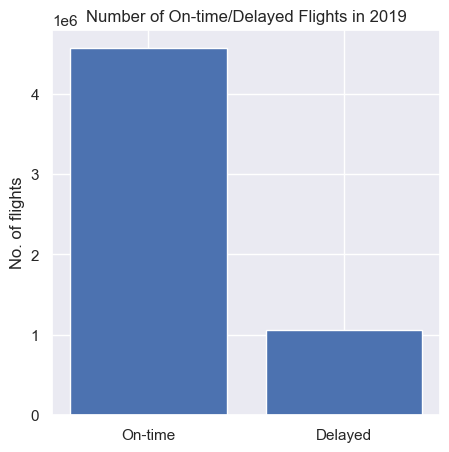

In [71]:
# display statistics in the form a bar graph

ontime_delay = [4572558, 1052840]
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(["On-time","Delayed"], ontime_delay)

plt.ylabel("No. of flights")
plt.title("Number of On-time/Delayed Flights in 2019")
plt.show()

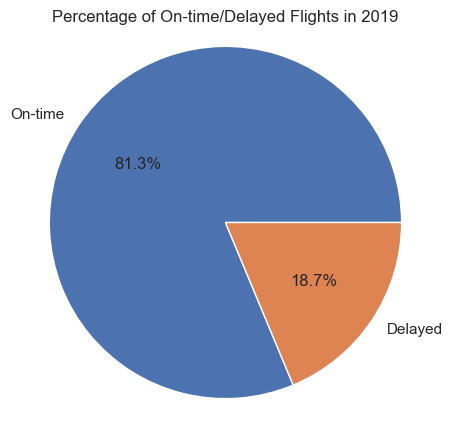

In [51]:
ontime_delay = [4572558, 1052840]  # Represents the frequency of each category

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(ontime_delay, labels=["On-time","Delayed"], autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of On-time/Delayed Flights in 2019')
plt.show()

## Which month has the most flight delays?

In [3]:
# creating a dictionary to show the flight delays for each month in 2019

delay = data.copy()
delay.drop(delay.loc[delay['DEP_DEL15']==0].index, axis=0, inplace=True)

delay_dict = dict(delay['MONTH'].value_counts().sort_index())
delay_dict

{1: 73723,
 2: 85613,
 3: 82837,
 4: 86015,
 5: 97737,
 6: 115257,
 7: 104827,
 8: 102374,
 9: 61087,
 10: 78574,
 11: 65470,
 12: 99326}

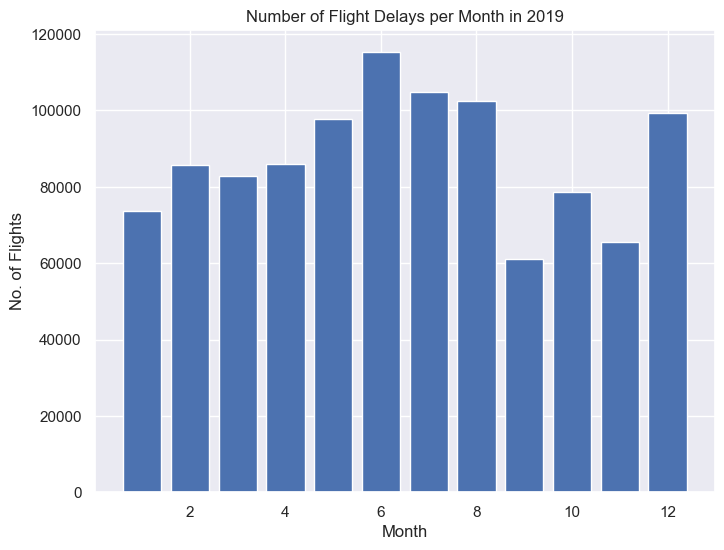

In [28]:
fig = plt.subplots(figsize = (8, 6))

month = list(delay_dict.keys())
values = list(delay_dict.values())

# creating the bar plot
plt.bar(month, values)

plt.ylabel("No. of Flights")
plt.xlabel("Month")
plt.title("Number of Flight Delays per Month in 2019")
plt.show()

**Observations**
1. Most flight delay occur during summer and in December - possibly due to adverse weather conditions and high number of concurrent flights.
2. September has the least number of flight delays.

## Which airline has the most flight delays in 2019?

In [4]:
# creating a dictionary to show the number of flights delays per airline in 2019

airline_delay = dict(delay['CARRIER_NAME'].value_counts().sort_index())
airline_delay

{'Alaska Airlines Inc.': 34301,
 'Allegiant Air': 7622,
 'American Airlines Inc.': 150064,
 'American Eagle Airlines Inc.': 26818,
 'Atlantic Southeast Airlines': 19375,
 'Comair Inc.': 42972,
 'Delta Air Lines Inc.': 121175,
 'Endeavor Air Inc.': 29879,
 'Frontier Airlines Inc.': 29883,
 'Hawaiian Airlines Inc.': 4978,
 'JetBlue Airways': 63287,
 'Mesa Airlines Inc.': 29703,
 'Midwest Airline, Inc.': 40801,
 'SkyWest Airlines Inc.': 79722,
 'Southwest Airlines Co.': 250161,
 'Spirit Air Lines': 31602,
 'United Air Lines Inc.': 90497}

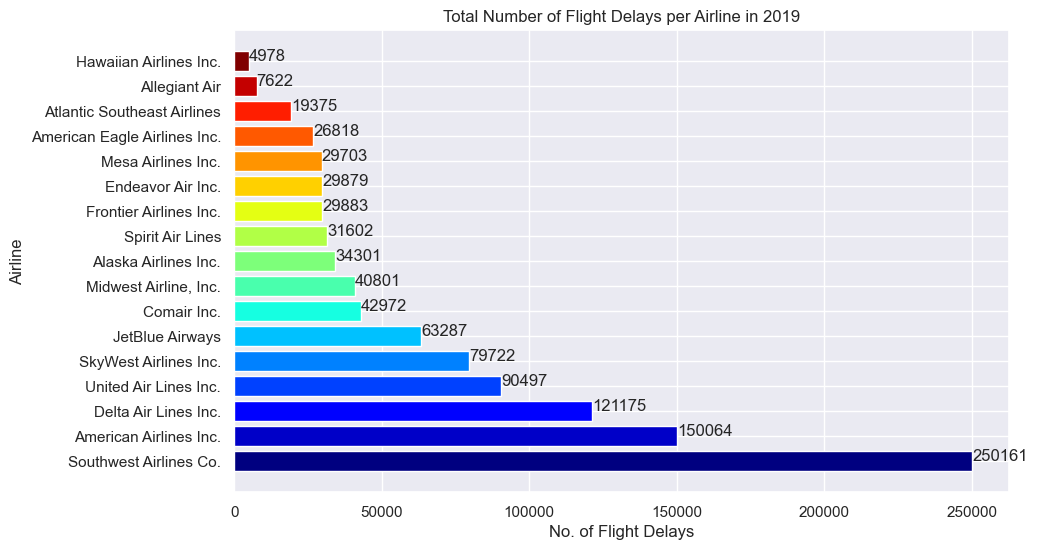

In [14]:
import matplotlib.pyplot as plt

sorted_data = dict(sorted(airline_delay.items(), key=lambda x:x[1], reverse=True))

# Extract labels and values
labels = list(sorted_data.keys())
values = list(sorted_data.values())

# Plot horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_data)), values, color=plt.cm.jet(np.linspace(0, 1, len(sorted_data))))
plt.yticks(range(len(sorted_data)), labels)
plt.xlabel('No. of Flight Delays')
plt.ylabel('Airline')
plt.title('Total Number of Flight Delays per Airline in 2019')

# Annotating count values on each bar
for index, value in enumerate(values):
    plt.text(value, index, str(value))  # Placing the count value next to the bar

# Display the plot
plt.show()

**Observations**
- Southwest Airlines has the most number of flight delays in 2019. Nearly 60% increase as compared with American Airlines.

## Which airport has the most flight delays in 2019?

In [26]:
# identifying which airport has the most flight delays by counting 
# the appearance of each airport after filtering only the delayed flights

airport_delay = pd.DataFrame(delay['DEPARTING_AIRPORT'].value_counts().sort_index())
airport_delay.sort_values(by='count', ascending=False).head(10)

,count
DEPARTING_AIRPORT,
Atlanta Municipal,65892
Dallas Fort Worth Regional,65497
Stapleton International,55609
Douglas Municipal,44958
San Francisco International,36856
Houston Intercontinental,33993
Newark Liberty International,33746
Phoenix Sky Harbor International,33027
McCarran International,32294


In [27]:
airport_delay.sort_values(by='count', ascending=False).tail(5)

,count
DEPARTING_AIRPORT,
Fresno Air Terminal,1939
Anchorage International,1870
Spokane International,1505
Lihue Airport,1292
Keahole,1274


**Observations**
- Atlanta Municipal Airport has the most number of flight delays occuring in 2019.
- Keahole Airport has the least number of flight delays of 1274.

# Explore Carriers - `CARRIER_NAME`

- This column variable represents the name of the airline carrier.

In [4]:
# find the number of unique airlines
carrier = data['CARRIER_NAME']
airlines = []

print("Total Number of unique airlines: ", carrier.nunique())
print("")

for i in carrier.unique():
    print(i)
    airlines.append(i)

Total Number of unique airlines:  17

Southwest Airlines Co.
Delta Air Lines Inc.
Spirit Air Lines
Frontier Airlines Inc.
Alaska Airlines Inc.
Hawaiian Airlines Inc.
American Airlines Inc.
United Air Lines Inc.
JetBlue Airways
Allegiant Air
SkyWest Airlines Inc.
Mesa Airlines Inc.
American Eagle Airlines Inc.
Midwest Airline, Inc.
Comair Inc.
Endeavor Air Inc.
Atlantic Southeast Airlines


In [5]:
# Calculate the total number of flights by each airline
print("Total Number of Flights per Airline in 2019:")
carrier.value_counts()

Total Number of Flights per Airline in 2019:


CARRIER_NAME
Southwest Airlines Co.          1191332
Delta Air Lines Inc.             857614
American Airlines Inc.           763605
SkyWest Airlines Inc.            470586
United Air Lines Inc.            455952
Midwest Airline, Inc.            255182
JetBlue Airways                  246443
Comair Inc.                      222532
Alaska Airlines Inc.             208688
Endeavor Air Inc.                179081
Spirit Air Lines                 169593
American Eagle Airlines Inc.     156157
Mesa Airlines Inc.               150094
Frontier Airlines Inc.           114878
Atlantic Southeast Airlines       85169
Hawaiian Airlines Inc.            58806
Allegiant Air                     39686
Name: count, dtype: int64

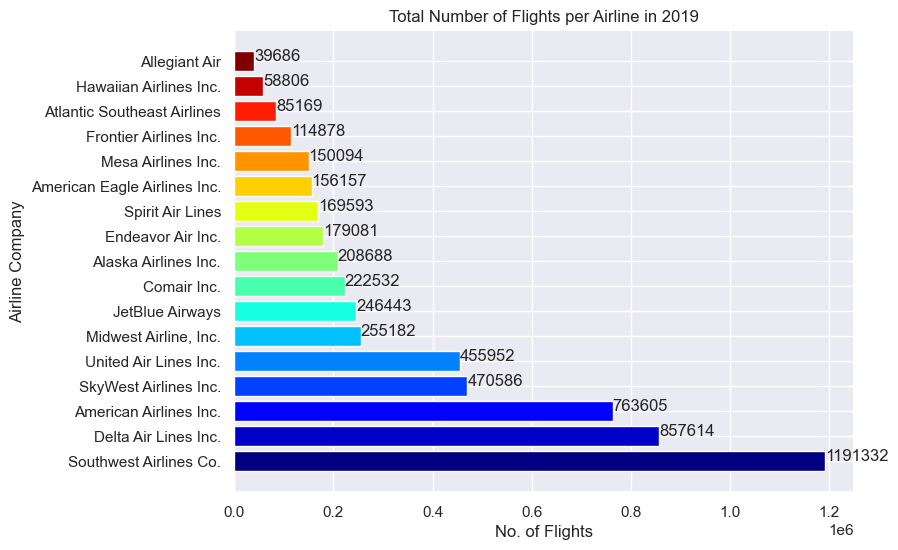

In [5]:
airline_dict = dict(sorted(dict(carrier.value_counts()).items(), key=lambda item: item[1], reverse=True))
airlines = list(airline_dict.keys())
counts = list(airline_dict.values())

# Plotting the horizontal bar graph
plt.figure(figsize=(8, 6))
plt.barh(airlines, counts, color=plt.cm.jet(np.linspace(0, 1, len(airlines))))

# Annotating count values on each bar
for index, value in enumerate(counts):
    plt.text(value, index, str(value))  # Placing the count value next to the bar

# Adding labels and title
plt.xlabel('No. of Flights')
plt.ylabel('Airline Company')
plt.title('Total Number of Flights per Airline in 2019')

plt.show()

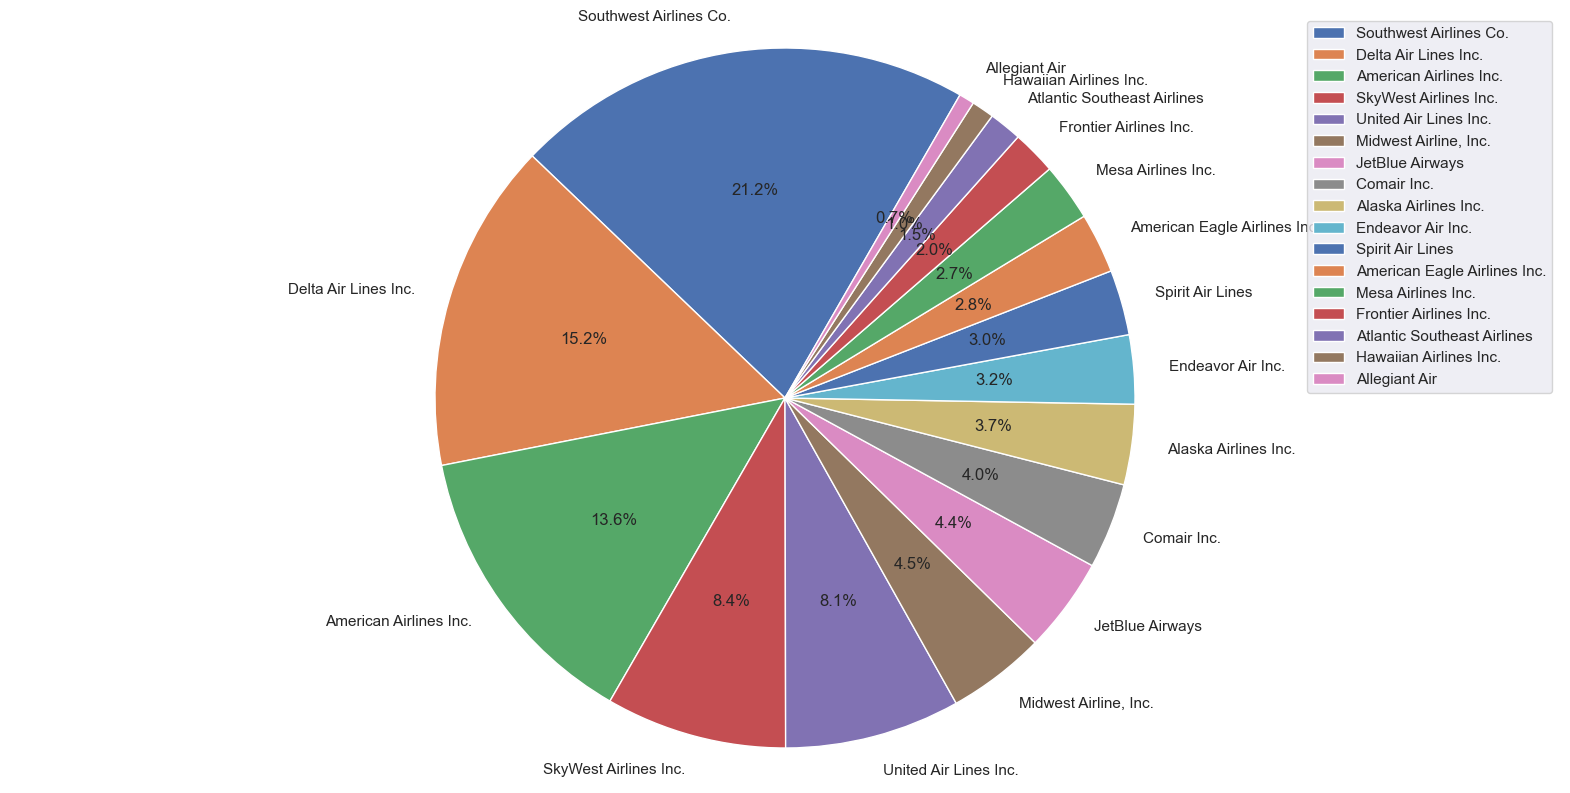

In [24]:
# Extract labels and sizes
labels = airline_dict.keys()
sizes = airline_dict.values()

# Plot pie chart
plt.figure(figsize=(20, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)

# Optionally, add a legend
plt.legend()

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Observations**
- Southwest Airlines is the most popular airline company based on the total number of flights in 2019. 21% of all flights were from this company.
- Followed by, Delta Air Lines as the second most popular airline company and American Airlines as the third most popular airline company.
- These 3 airlines remain to be the most popular today as they are major airline companies in the US.

# Explore Monthly Flights per Airline - `AIRLINE_FLIGHTS_MONTH`

- This column shows the number of flights per month by airline.

In [32]:
# display the month, airline and number of flights per month by the airline

airlineFM = data[['MONTH', 'CARRIER_NAME', 'AIRLINE_FLIGHTS_MONTH']]
airlineFM = airlineFM.drop_duplicates()
airlineFM

,MONTH,CARRIER_NAME,AIRLINE_FLIGHTS_MONTH
0,1,Southwest Airlines Co.,107363
1,1,Delta Air Lines Inc.,73508
4,1,Spirit Air Lines,15023
5,1,Frontier Airlines Inc.,9496
11,1,Alaska Airlines Inc.,20315
...,...,...,...
5147702,12,American Eagle Airlines Inc.,26721
5148117,12,Mesa Airlines Inc.,18545
5148242,12,Comair Inc.,24003
5148320,12,Atlantic Southeast Airlines,10970


**Observation**
- `AIRLINE_FLIGHTS_MONTH` shows the total number of flights per airline for the month
- As there are 17 airlines, lets consider the airline with the most number of flights - Southwest Airlines Co.

### Exploring the number of flights per month by Southwest Airlines Co.

In [33]:
sacFM = airlineFM.loc[airlineFM['CARRIER_NAME']=="Southwest Airlines Co."]
sacFM

,MONTH,CARRIER_NAME,AIRLINE_FLIGHTS_MONTH
0,1,Southwest Airlines Co.,107363
441340,2,Southwest Airlines Co.,94922
842253,3,Southwest Airlines Co.,114119
1322299,4,Southwest Airlines Co.,110752
1786220,5,Southwest Airlines Co.,113709
2268788,6,Southwest Airlines Co.,112879
2747330,7,Southwest Airlines Co.,117728
3243070,8,Southwest Airlines Co.,114987
3740153,9,Southwest Airlines Co.,107436
4198774,10,Southwest Airlines Co.,115051


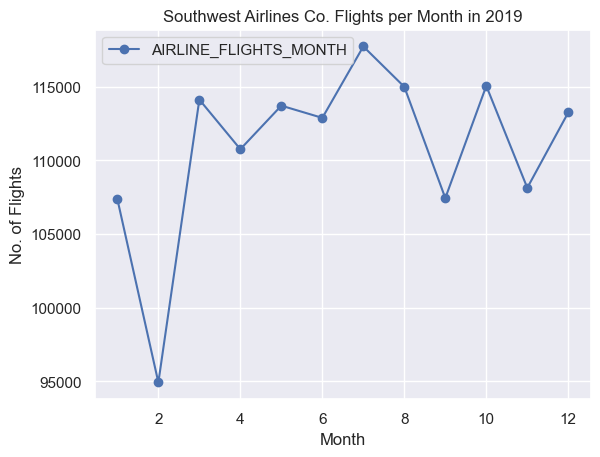

In [48]:
# Plotting selected columns
selected_columns = ['MONTH', 'AIRLINE_FLIGHTS_MONTH']
sacFM[selected_columns].plot(x='MONTH', y='AIRLINE_FLIGHTS_MONTH', marker='o', linestyle='-')
plt.title('Southwest Airlines Co. Flights per Month in 2019')
plt.xlabel('Month')
plt.ylabel('No. of Flights')
plt.grid(True)
plt.show()

**Observations**
- Southwest Airlines had the least number of operating flights in February 2019.
- Southwest Airlines busiest period would be during July as it had the most number of flights per month for July.

# Explore Carriers - `DEPARTING_AIRPORT`

In [60]:
da = data['DEPARTING_AIRPORT']
airports = []

print("Total number of unique airports: ", da.nunique())
print("")

for i in da.unique():
    print(i)
    airports.append(i)

Total number of unique airports:  85

McCarran International
Orlando International
Boise Air Terminal
Raleigh-Durham International
Kansas City International
Seattle International
Miami International
General Mitchell Field
Tampa International
San Antonio International
Fort Lauderdale-Hollywood International
Atlanta Municipal
Tulsa International
San Francisco International
Portland International
Honolulu International
Reno/Tahoe International
Southwest Florida International
Spokane International
Salt Lake City International
Orange County
Fresno Air Terminal
Logan International
Nashville International
Palm Springs International
Phoenix Sky Harbor International
San Diego International Lindbergh Fl
Austin - Bergstrom International
Minneapolis-St Paul International
Savannah/Hilton Head International
Detroit Metro Wayne County
Philadelphia International
John F. Kennedy International
Northwest Arkansas Regional
Myrtle Beach International
Truax Field
Hollywood-Burbank Midpoint
Stapleton Interna

In [61]:
da.value_counts()

DEPARTING_AIRPORT
Atlanta Municipal                 392603
Dallas Fort Worth Regional        296449
Stapleton International           247175
Douglas Municipal                 231855
Houston Intercontinental          177108
                                   ...  
Fresno Air Terminal                12221
Palm Springs International         11987
Spokane International              11938
Myrtle Beach International         11528
Portland International Jetport     10863
Name: count, Length: 85, dtype: int64

**Observations**
1. Atlanta Municipal Airport is the busiest airport with the a total of **392,603** flights in 2019.
2. Portland International Jetport has the **least** flights operating in 2019.
3. There are **85 unique** airports in the data.

# Explore Carriers - `AIRPORT_FLIGHTS_MONTH`
- this column displays the number of flights based on the departing airport for the month

In [51]:
airportFM = data[['MONTH','DEPARTING_AIRPORT','AIRPORT_FLIGHTS_MONTH']]
airportFM

,MONTH,DEPARTING_AIRPORT,AIRPORT_FLIGHTS_MONTH
0,1,McCarran International,13056
1,1,McCarran International,13056
2,1,McCarran International,13056
3,1,McCarran International,13056
4,1,McCarran International,13056
...,...,...,...
5625393,12,Lihue Airport,1318
5625394,12,Lihue Airport,1318
5625395,12,Lihue Airport,1318
5625396,12,Lihue Airport,1318


Let's explore the `AIRPORT_FLIGHTS_MONTH` for busiest airport previously identified - Atlanta Municipal Airport.

In [63]:
amaFM = airportFM.loc[airportFM['DEPARTING_AIRPORT']=='Atlanta Municipal']
amaFM

,MONTH,DEPARTING_AIRPORT,AIRPORT_FLIGHTS_MONTH
2495,1,Atlanta Municipal,30842
2496,1,Atlanta Municipal,30842
2497,1,Atlanta Municipal,30842
2498,1,Atlanta Municipal,30842
2499,1,Atlanta Municipal,30842
...,...,...,...
5550291,12,Atlanta Municipal,32251
5550292,12,Atlanta Municipal,32251
5550293,12,Atlanta Municipal,32251
5550294,12,Atlanta Municipal,32251


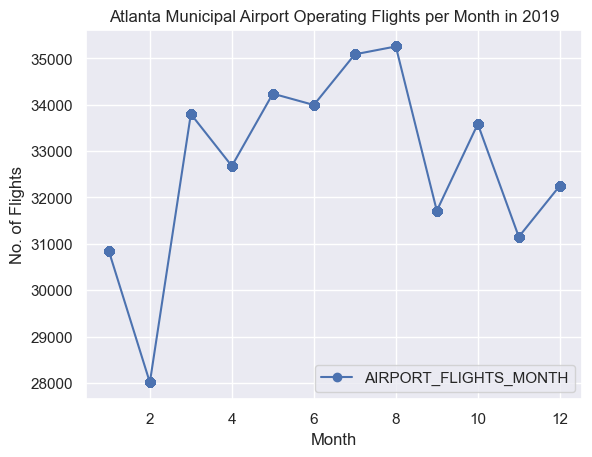

In [64]:
# Plotting selected columns
selected_columns = ['MONTH', 'AIRPORT_FLIGHTS_MONTH']
amaFM[selected_columns].plot(x='MONTH', y='AIRPORT_FLIGHTS_MONTH', marker='o', linestyle='-')
plt.title('Atlanta Municipal Airport Operating Flights per Month in 2019')
plt.xlabel('Month')
plt.ylabel('No. of Flights')
plt.grid(True)
plt.show()

**Observation**
1. Notice how there is a similar trend in the number of flights for each airport and each airline.
2. The number of flights operating are the least during the month of February in 2019.
3. The peak travel period would be between June and August in 2019.

# Explore Average Monthly Passenger per Airport - `AVG_MONTHLY_PASS_AIRPORT`

In [85]:
ampa = data[['DEPARTING_AIRPORT','AVG_MONTHLY_PASS_AIRPORT']]
ampa = ampa.drop_duplicates(subset = ['DEPARTING_AIRPORT','AVG_MONTHLY_PASS_AIRPORT'], keep='first')
ampa

,DEPARTING_AIRPORT,AVG_MONTHLY_PASS_AIRPORT
0,McCarran International,1903352
437,Orlando International,1823051
824,Boise Air Terminal,171473
874,Raleigh-Durham International,573075
1042,Kansas City International,477995
...,...,...
120510,Cleveland-Hopkins International,404265
120710,William P Hobby,589072
126953,James M Cox/Dayton International,70476
168624,Keahole,154082


In [88]:
ampa_top10 = ampa.nlargest(10,['AVG_MONTHLY_PASS_AIRPORT'])
ampa_top10

,DEPARTING_AIRPORT,AVG_MONTHLY_PASS_AIRPORT
2495,Atlanta Municipal,4365661
16944,Dallas Fort Worth Regional,2907365
10410,Stapleton International,2743323
11476,Douglas Municipal,2006675
1197,Seattle International,1960746
3634,San Francisco International,1908862
0,McCarran International,1903352
6136,Phoenix Sky Harbor International,1827202
437,Orlando International,1823051
27943,Newark Liberty International,1708599


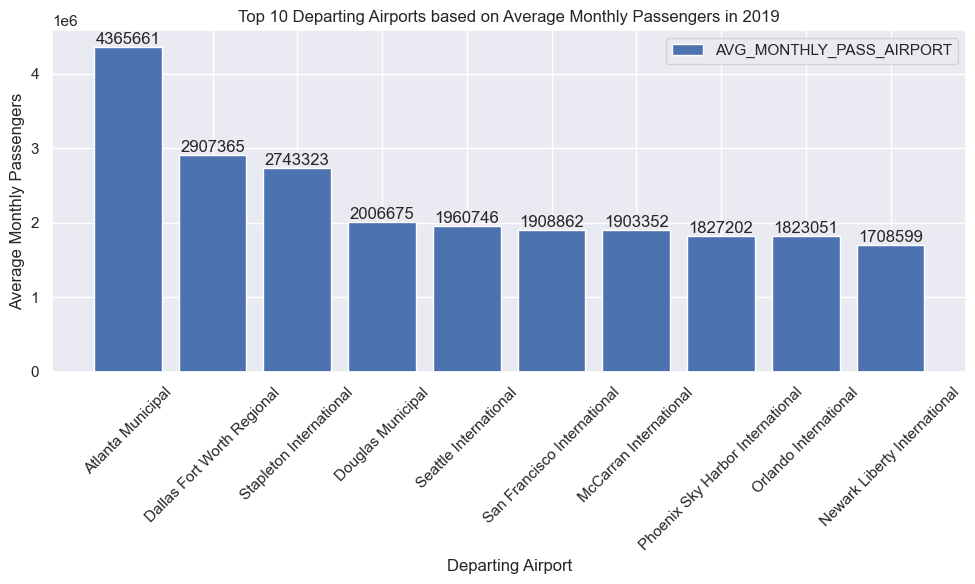

In [105]:
import matplotlib.pyplot as plt

# Columns to plot
selected_columns = ['AVG_MONTHLY_PASS_AIRPORT']

# Plotting
plt.figure(figsize=(10, 6))

# Iterating over each column and plotting bars with corresponding colors
for i, col in enumerate(selected_columns):
    bars = plt.bar(ampa_top10['DEPARTING_AIRPORT'], ampa_top10[col], label=col)
    
    # Displaying values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Departing Airport')
plt.ylabel('Average Monthly Passengers')
plt.title('Top 10 Departing Airports based on Average Monthly Passengers in 2019')
plt.legend()
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()


**Observations**
- Atlanta Municipal is the busiest airport as it has the highest monthly number of passengers on average.
- Possible reasons could be due to its strategic location at the heart of the US.
- Ideal airport for domestic and international flights.

# Explore Average Monthly Passenger per Airline - `AVG_MONTHLY_PASS_AIRLINE`

In [106]:
ampAirline = data[['CARRIER_NAME','AVG_MONTHLY_PASS_AIRLINE']]
ampAirline = ampAirline.drop_duplicates(subset = ['CARRIER_NAME','AVG_MONTHLY_PASS_AIRLINE'], keep='first')
ampAirline

,CARRIER_NAME,AVG_MONTHLY_PASS_AIRLINE
0,Southwest Airlines Co.,13382999
1,Delta Air Lines Inc.,12460183
4,Spirit Air Lines,2688839
5,Frontier Airlines Inc.,1857122
11,Alaska Airlines Inc.,2884187
17,Hawaiian Airlines Inc.,905990
19,American Airlines Inc.,11744595
21,United Air Lines Inc.,8501631
36,JetBlue Airways,3190369
42,Allegiant Air,1257616


In [107]:
ampAirline_top10 = ampAirline.nlargest(10,['AVG_MONTHLY_PASS_AIRLINE'])
ampAirline_top10

,CARRIER_NAME,AVG_MONTHLY_PASS_AIRLINE
0,Southwest Airlines Co.,13382999
1,Delta Air Lines Inc.,12460183
19,American Airlines Inc.,11744595
21,United Air Lines Inc.,8501631
75,SkyWest Airlines Inc.,3472966
36,JetBlue Airways,3190369
11,Alaska Airlines Inc.,2884187
4,Spirit Air Lines,2688839
5,Frontier Airlines Inc.,1857122
889,"Midwest Airline, Inc.",1529740


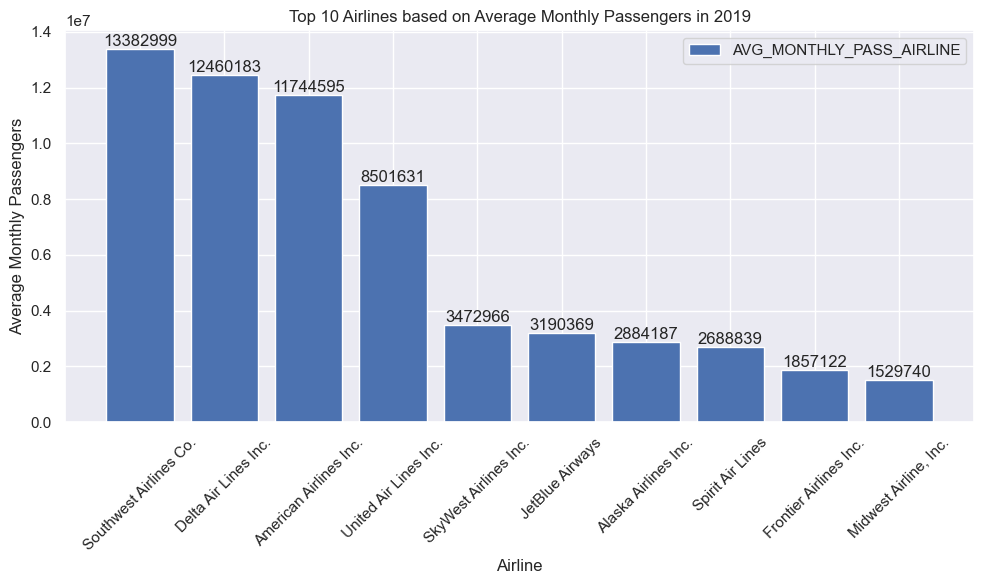

In [108]:
# Columns to plot
selected_columns = ['AVG_MONTHLY_PASS_AIRLINE']

# Plotting
plt.figure(figsize=(10, 6))

# Iterating over each column and plotting bars with corresponding colors
for i, col in enumerate(selected_columns):
    bars = plt.bar(ampAirline_top10['CARRIER_NAME'], ampAirline_top10[col], label=col)
    
    # Displaying values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Airline')
plt.ylabel('Average Monthly Passengers')
plt.title('Top 10 Airlines based on Average Monthly Passengers in 2019')
plt.legend()
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()


**Observations**
- Top 3 airline companies are Southwest Airlines, Delta Air Lines and American Airlines with an average monthly passengers of 13 million, 12 million and 11 million.

# Total Number of Flights per Month
- Using the `MONTH` variable, we can determine the number of flights for each month and plot a trendline

In [169]:
month = data['MONTH']
month_dict = dict(month.value_counts().sort_index())
month_dict

{1: 440961,
 2: 401256,
 3: 479998,
 4: 463909,
 5: 482289,
 6: 478904,
 7: 495751,
 8: 497085,
 9: 458615,
 10: 486965,
 11: 461580,
 12: 478085}

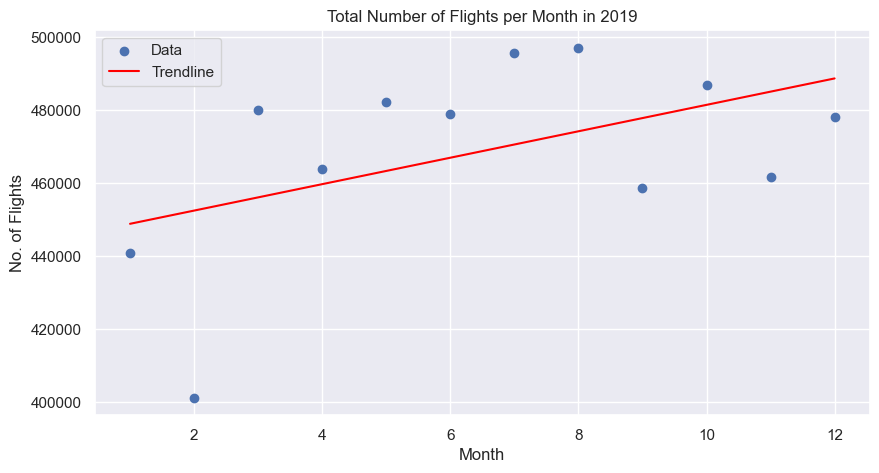

In [168]:
# Sample data
x = list(month_dict.keys())
y = list(month_dict.values())

# Fit a linear trendline (you can use other regression models as well)
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the data points
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')

# Plot the trendline
plt.plot(x, trendline(x), color='red', label='Trendline')

# Add labels and legend
plt.xlabel('Month')
plt.ylabel('No. of Flights')
plt.title('Total Number of Flights per Month in 2019')
plt.legend()

# Show plot
plt.show()

**Observations**
1. Increasing number of flights towards the end of the year. A possible reason is that more families are on vacation for celebratory purposes.

2. The number of flights in February were the least.

# Explore Departure Time Block - `DEP_TIME_BLK`
- Using the `DEP_TIME_BLK` variable, we can determine time of the day which has the most flight delays

In [28]:
time_dict = dict(delay['DEP_TIME_BLK'].value_counts().sort_index())
time_dict

{'0001-0559': 10345,
 '0600-0659': 26584,
 '0700-0759': 35237,
 '0800-0859': 40929,
 '0900-0959': 44637,
 '1000-1059': 50861,
 '1100-1159': 56451,
 '1200-1259': 60092,
 '1300-1359': 59295,
 '1400-1459': 70733,
 '1500-1559': 75173,
 '1600-1659': 79252,
 '1700-1759': 89054,
 '1800-1859': 87129,
 '1900-1959': 86675,
 '2000-2059': 79736,
 '2100-2159': 51519,
 '2200-2259': 40303,
 '2300-2359': 8835}

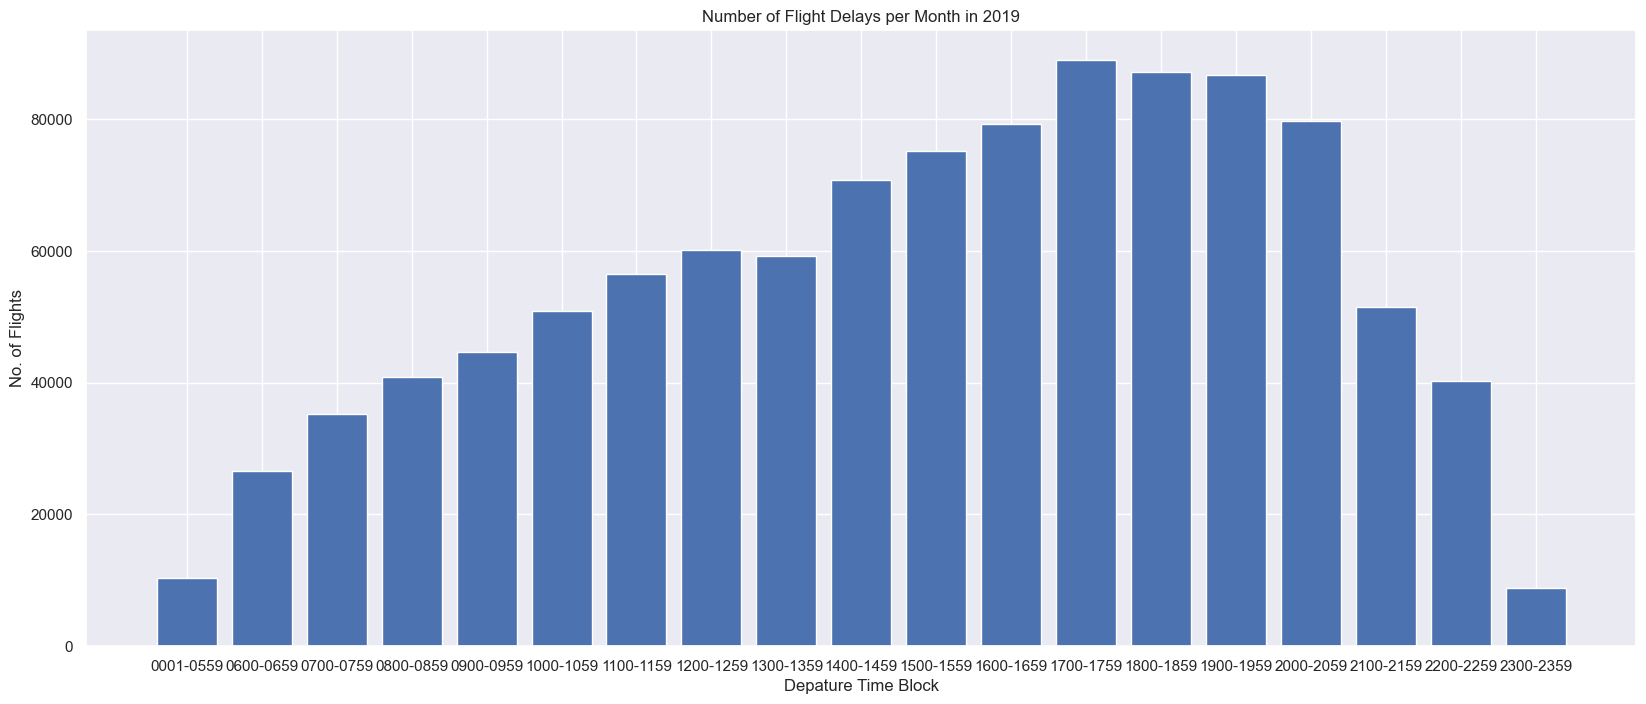

In [34]:
fig = plt.subplots(figsize = (20, 8))

time_blk = list(time_dict.keys())
values = list(time_dict.values())

# creating the bar plot
plt.bar(time_blk, values)

plt.ylabel("No. of Flights")
plt.xlabel("Depature Time Block")
plt.title("Number of Flight Delays per Month in 2019")
plt.show()

**Observation**
1. Most flight delays occur during the evening to night (1700hrs - 2059hrs)
2. Least flight delays occur around midnight.

# Correlation Matrix
- Before we can find the correlation between the variables, we need to **encode the categorical variables** first.

### Encoding of categorical variables before finding correlation

In [35]:
# Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

def label_encoder(catergoricalVar, df):
    for var in categoricalVar:
        df[var] = LabelEncoder().fit_transform(df[var])
    return df

categoricalVar = ['DEP_TIME_BLK','CARRIER_NAME','DEPARTING_AIRPORT','PREVIOUS_AIRPORT']
data = label_encoder(categoricalVar, data)

data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
0,1,7,0,3,2,1,25,143,14,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0
1,1,7,0,2,7,1,29,191,6,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0
2,1,7,0,1,7,1,27,199,6,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0
3,1,7,0,1,9,1,27,180,6,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0
4,1,7,0,0,7,1,10,182,15,13056,...,40,36.08,-115.152,215,2.91,0.0,0.0,0.0,65.0,45.0


In [40]:
# Calculate the correlation scores 
data.corr()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
MONTH,1.000000,0.006868,-0.016344,0.000273,-0.001085,0.016653,0.024320,0.006492,0.001047,0.036810,...,-0.000448,0.011234,-0.006513,-0.002745,-0.114033,-0.003567,-0.048476,-0.079368,0.171931,0.165740
DAY_OF_WEEK,0.006868,1.000000,0.001327,0.005499,0.012904,-0.029554,-0.024324,0.008727,-0.002114,-0.001883,...,0.003260,-0.010955,-0.004342,0.006483,0.003518,0.019639,-0.009724,-0.008657,0.007167,0.008755
DEP_DEL15,-0.016344,0.001327,1.000000,0.169811,0.020614,0.119694,0.003582,0.016065,0.021274,0.018807,...,0.001874,-0.009718,0.022126,-0.012305,0.046249,0.077338,0.042445,0.017716,-0.002683,0.012087
DEP_TIME_BLK,0.000273,0.005499,0.169811,1.000000,-0.024205,0.749079,0.077475,-0.014443,0.014162,0.121244,...,-0.040561,-0.043653,-0.004923,-0.087905,0.005293,-0.004530,-0.007460,-0.011072,0.024789,0.026951
DISTANCE_GROUP,-0.001085,0.012904,0.020614,-0.024205,1.000000,-0.227848,-0.033795,0.431426,-0.051344,-0.012560,...,0.117281,0.021503,-0.137370,0.090554,0.041474,-0.008678,-0.000125,-0.010067,-0.001404,0.024532
SEGMENT_NUMBER,0.016653,-0.029554,0.119694,0.749079,-0.227848,1.000000,0.030854,-0.189583,0.080634,0.053152,...,-0.036170,-0.035217,-0.071628,-0.134658,-0.027854,-0.015294,-0.012091,-0.006143,0.030382,0.016046
CONCURRENT_FLIGHTS,0.024320,-0.024324,0.003582,0.077475,-0.033795,0.030854,1.000000,-0.021663,-0.142088,0.852745,...,-0.314451,-0.076447,0.085905,0.016992,0.046126,-0.021789,-0.028574,-0.060500,0.097213,0.064268
NUMBER_OF_SEATS,0.006492,0.008727,0.016065,-0.014443,0.431426,-0.189583,-0.021663,1.000000,-0.054946,0.043728,...,0.051373,-0.110541,-0.128786,0.048301,0.000620,-0.010484,-0.008390,-0.016152,0.049748,0.066341
CARRIER_NAME,0.001047,-0.002114,0.021274,0.014162,-0.051344,0.080634,-0.142088,-0.054946,1.000000,-0.137062,...,0.120298,-0.023132,-0.063593,0.067146,0.032836,-0.014312,0.014335,-0.001367,-0.003221,-0.013256
AIRPORT_FLIGHTS_MONTH,0.036810,-0.001883,0.018807,0.121244,-0.012560,0.053152,0.852745,0.043728,-0.137062,1.000000,...,-0.322219,-0.091316,0.068693,0.018966,0.054259,-0.019668,-0.029383,-0.073911,0.124142,0.085864


<Axes: >

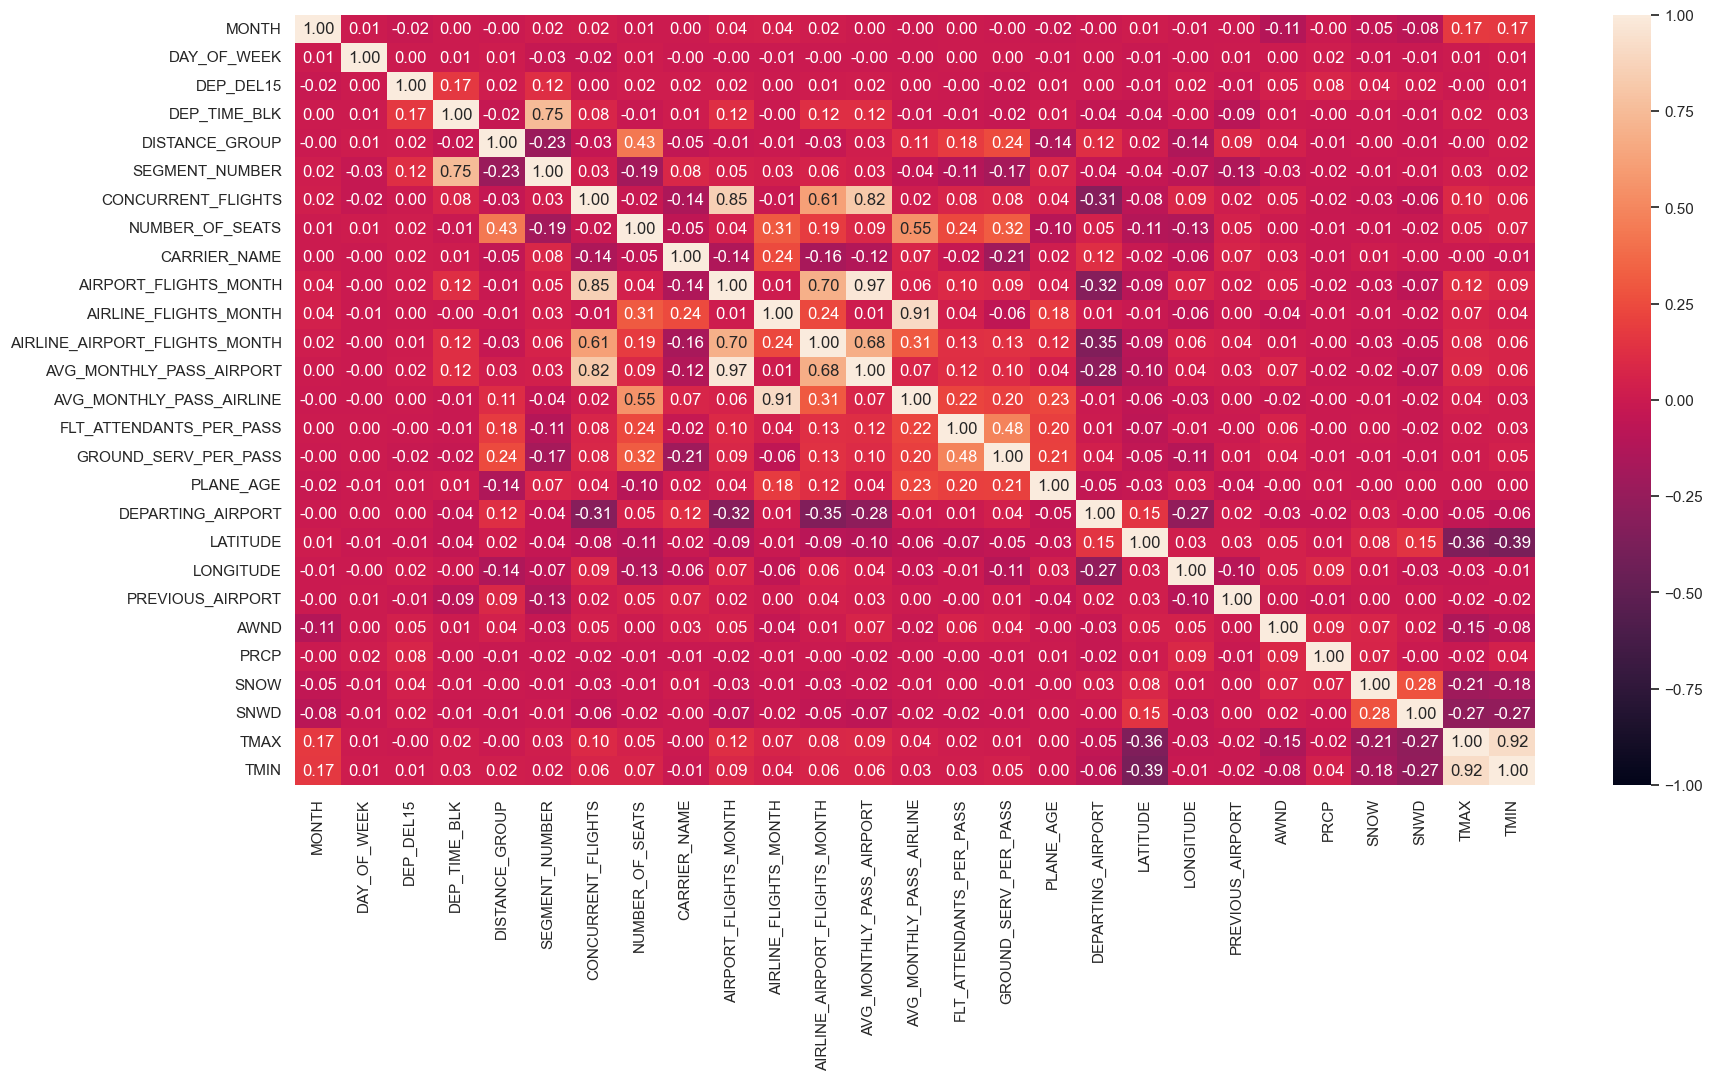

In [42]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 10))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Based on the correlation matrix above, we can identify the variables with the highest correlation.

| Variables | Correlation Score |
| :-: | :-: |
| `AVG_MONTHLY_PASS_AIRPORT` vs `AIRPORT_FLIGHTS_MONTH` | 0.97 |
| `TMAX` vs `TMIN` | 0.92 |
| `AVG_MONTHLY_PASS_AIRLINE` vs `AIRLINE_FLIGHTS_MONTH` | 0.91 |
| `AIRPORT_FLIGHTS_MONTH` vs `CONCURRENT_FLIGHTS` | 0.85 |
| `AVG_MONTHLY_PASS_AIRPORT` vs `CONCURRENT_FLIGHTS` | 0.82 |
| `SEGMENT_NUMBER` vs `DEP_TIME_BLK` | 0.75 |
| `AIRLINE_AIRPORT_FLIGHTS_MONTH` vs `AIRPORT_FLIGHTS_MONTH` | 0.70 |

**Observations**
- Average monthly airport passengers and monthly flights by airport has the highest correlation of 0.97. This makes sense as both column variables relate to the airport and consider from two subjects - the number of flights and the number of passengers.
- The second highest correlation of variables are `TMAX` and `TMIN`. These variables represent the maximum and minimum temperature. It is not sufficient to tell how this two variables are correlated to each other.
- Similar to the first two variables, the average monthly airline passengers and monthly airline flights have a high correlation score of 0.91. Both of these variables represent statistics for airlines - monthly passenger taking the airline and the number of flight per month.